In [25]:
%matplotlib notebook
%matplotlib inline
import numpy as np
from collections import defaultdict 
import os
import json
import shutil
from matplotlib import pyplot as plt

In [26]:
path = "Runs/"

In [27]:
def create_folder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
        else:
            shutil.rmtree(directory)   
            os.makedirs(directory)
    except Error:
        print ('Error: unable to create' +  directory)

def get_list_folders(path):
    count = 0
    folders = []
    for i in os.listdir(path):
        full_path = path+i
        if os.path.isdir(full_path):
            folders.append(full_path)
    return folders

def get_relevant_folder_count(path):
    count = 0
    for i in os.listdir(path):
        full_path = path+i
        if os.path.isdir(full_path) and i.isdigit():
            count +=1
    return count
    
def get_list_of_json(path):
    json_paths = []
    file_path = '/metrics.json'
    for i in range(1, get_relevant_folder_count(path)+1):
        full_path = path+str(i)+file_path
        json_paths.append(full_path)
    return json_paths

In [32]:
REWARD_VAL = "REWARD"
EPSILON_VAL = "EPSILON"
SOLVEDAT_VAL = "SOLVEDAT"
AVG100_VAL = "AVG100"
VALUE_KEY = "values"

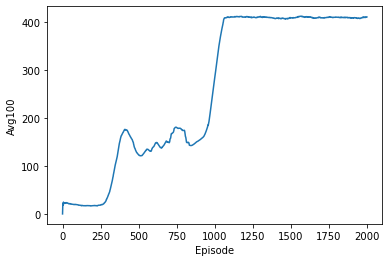

In [33]:
for folder in get_list_folders(path):
    # each folder is an experiment
    # average values so that each experiment can contribute only 1 value
    folder+="/"
#     destination = folder+"results/"
    
#     destination_epsilon = destination+"average_apsilon.csv"
#     destination_reward = destination+"average_reward.csv"
#     destination_solvedat = destination+"solvedat.json"
    
#     create_folder(destination)
    
    files = get_list_of_json(folder)
    num_run = len(files)
    
    file = files[0]
    # assuming number of ep is the max number of episodes per run
    num_ep = len(json.load(open(file))[EPSILON_VAL][VALUE_KEY])
    
    
    for i, file in enumerate(files):
        
        folder_num = str(i+1)
        current_folder = folder+""+folder_num+"/graphs/"
        data = json.load(open(file))
        
        list_epsilon = data[EPSILON_VAL][VALUE_KEY]
        list_reward = data[REWARD_VAL][VALUE_KEY]
        list_avg100 = data[AVG100_VAL][VALUE_KEY]
        solved_at = data[SOLVEDAT_VAL][VALUE_KEY][0]
        
        plt.clf()
        plt.plot(list_epsilon)
        plt.xlabel("Episode")
        plt.ylabel("Epsilon")
        save_path = current_folder +"epsilon.png"
        plt.savefig(save_path)
        
        plt.clf()
        plt.plot(list_reward)
        plt.xlabel("Episode")
        plt.ylabel("Reward")
        save_path = current_folder +"reward.png"
        plt.savefig(save_path)
        
        plt.clf()
        plt.plot(list_avg100)
        plt.xlabel("Episode")
        plt.ylabel("Avg100")
        save_path = current_folder +"avg100.png"
        plt.savefig(save_path)
        
        
#         print("\n\n\n\n",i,"\t",folder)
#         print("\n\nlist ep", list_epsilon[:10])
#         print("\n\nlist reward", list_reward[:10])
        
#         np_reward[i] = list_reward
#         np_epsilon[i] = list_epsilon
    
#     np_reward = np.mean(np_reward, axis=0)
#     np_epsilon = np.mean(np_epsilon, axis=0)
        
#     print("REWARD\t",np_reward)
#     print("\n\n\nEPSILON\t",np_epsilon)
#     print("\n\n\nSolved Counter\t",solved_counter)

#     np.savetxt(destination_epsilon, np_epsilon, delimiter=',')
#     np.savetxt(destination_reward, np_reward, delimiter=',')
#     json_w = json.dumps(solved_counter)
#     f = open(destination_solvedat,"w")
#     f.write(json_w)
#     f.close()
